# Fake News vs Real News
---

> <strong>Notícias falsas</strong> (sendo também muito comum o uso do termo em inglês <strong>fake news</strong>) são uma forma de imprensa marrom que consiste na distribuição deliberada de desinformação ou boatos via jornal impresso, televisão, rádio, ou ainda online, como nas mídias sociais.

<p>Fake news sempre foram um problema, porém em 2016 com a eleição presidencial dos EUA acabaram ganhando uma notoriedade maior e
devido ao crescimento de redes sociais e maior facilidade de passar informação, o problema continua crescendo.</p>

## O desafio

<p>Encontrar um jeito eficiente de diferenciar as noticias falsas das noticias verdadeiras, de um modo automático e sem muita intervenção humana</p>

## Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import string
import sys
%matplotlib inline

In [20]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

## Análise exploratória 

In [21]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [22]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [23]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


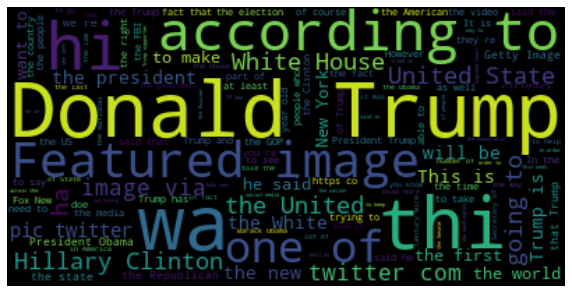

In [7]:
from wordcloud import WordCloud, ImageColorGenerator

# Junta todas as mensagens do dataFrame fake:
text = " ".join(review for review in df_fake.text)

# Gera a nuvem de palavras:
wordcloud = WordCloud().generate(text)

# Aumenta o tamanho e mostra a nuvem:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

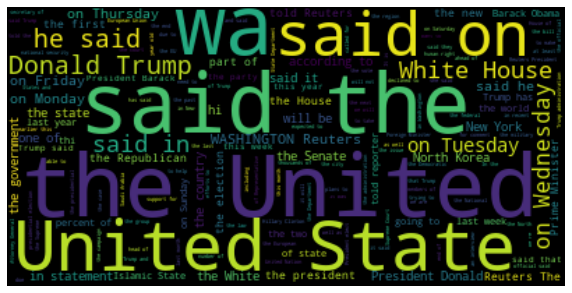

In [8]:
from wordcloud import WordCloud, ImageColorGenerator

# Junta todas as mensagens do dataFrame true:
text = " ".join(review for review in df_true.text)

# Gera a nuvem de palavras:
wordcloud = WordCloud().generate(text)

# Aumenta o tamanho e mostra a nuvem:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Definindo a função para tratamento do texto

In [40]:
count = 0 # variavel global para acompanhar a progressão do vetorizer

In [43]:
nlp.download("stopwords")
from nltk.corpus import stopwords
def clean_text(text):
    # Retirar pontuações
    nopunc = [char for char in text if char not in string.punctuation]
    
    # Juntar novamente
    nopunc = "".join(nopunc)
    
    # Remover stopwords
    msg = [word for word in nopunc.split() if word not in stopwords.words("english")]
    global count
    count += 1
    print(count, end="\r", flush=True)
    
    return msg

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Skiiney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df_true["text"].head(200).apply(clean_text)

0      [WASHINGTON, Reuters, The, head, conservative,...
1      [WASHINGTON, Reuters, Transgender, people, all...
2      [WASHINGTON, Reuters, The, special, counsel, i...
3      [WASHINGTON, Reuters, Trump, campaign, adviser...
4      [SEATTLEWASHINGTON, Reuters, President, Donald...
                             ...                        
195    [WASHINGTON, Reuters, President, Donald, Trump...
196    [WASHINGTON, Reuters, US, House, Republicans, ...
197    [WASHINGTON, Reuters, President, Donald, Trump...
198    [WASHINGTON, Reuters, The, Republican, chairma...
199    [WASHINGTON, Reuters, A, US, District, Court, ...
Name: text, Length: 200, dtype: object

## Separando o conjunto para criar o modelo

In [26]:
df_fake['target'] = 'fake'
df_true['target'] = 'true'
news = pd.concat([df_fake, df_true]).reset_index(drop = True)
news.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [85]:
news["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [27]:
news["length"] = news["text"].apply(len)
news.head()

,title,text,subject,date,target,length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,2346


## Criando o modelo com tf-idf

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
tdidf_transformer = TfidfTransformer()

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
text_train, text_test, target_train, target_test = train_test_split(news["text"], news["target"], test_size=0.3)

In [37]:
from sklearn.pipeline import Pipeline

## Pipeline para fitar o modelo 

In [75]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=clean_text)), # vetorização e contagem das palavras, o analyzer aplica o filtro para limpar as palavras
    ("tfidf", TfidfTransformer()), # metódo do TF-IDF
    ("classifier", MultinomialNB()) # Modelo de classificação, nesse caso foi usado naive bayes
])

In [76]:
pipeline.fit(text_train, target_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x00000277C3EA6798>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [77]:
pred = pipeline.predict(text_test)

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Métricas do modelo

In [80]:
print(classification_report(pred, target_test)) 

              precision    recall  f1-score   support

        fake       0.96      0.98      0.97      6856
        true       0.98      0.95      0.97      6614

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



In [81]:
print(confusion_matrix(pred, target_test)) 

[[6715  141]
 [ 302 6312]]
